# Data Exploration Using Housing Data

In [136]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
BASE_DIR = os.path.dirname(os.path.dirname(os.path.abspath("__file__")))
dataset_path = os.path.join(BASE_DIR, "hw1", "housing_data.csv")
dataset_path

'/Users/tonmoy/Library/CloudStorage/OneDrive-IndianaUniversity/Academics/Spring 2024/My Courses/Data Mining/nhaldert-bkgichin/hw1/housing_data.csv'

### Sample Dataset

In [70]:
df = pd.read_csv(dataset_path)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Dataset Information

Here we can see the type of attributes the data holds as well as empty and non-empty data for each of the attributes

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Continuing, we can see that there are a total of 19 attributes which contains empty value, and given the total number of instances of records the missing value percentage is relatively high

In [72]:
missing_columns = list()
for column in df.columns:
    total_missing = df[column].isna().sum()
    if total_missing > 0:
        missing_columns.append((column, total_missing))
missing_columns

[('LotFrontage', 259),
 ('Alley', 1369),
 ('MasVnrType', 872),
 ('MasVnrArea', 8),
 ('BsmtQual', 37),
 ('BsmtCond', 37),
 ('BsmtExposure', 38),
 ('BsmtFinType1', 37),
 ('BsmtFinType2', 38),
 ('Electrical', 1),
 ('FireplaceQu', 690),
 ('GarageType', 81),
 ('GarageYrBlt', 81),
 ('GarageFinish', 81),
 ('GarageQual', 81),
 ('GarageCond', 81),
 ('PoolQC', 1453),
 ('Fence', 1179),
 ('MiscFeature', 1406)]

### Understanding The Missing Values & Comparison

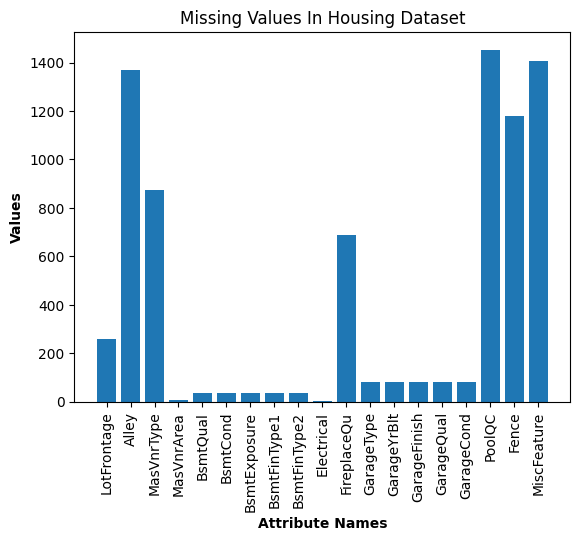

In [73]:
plt.bar([column for column,value in missing_columns], [value for column,value in missing_columns])

plt.xlabel('Attribute Names', fontweight='bold')
plt.ylabel('Values', fontweight='bold')
plt.title('Missing Values In Housing Dataset')

plt.xticks(rotation=90)
# plt.figure(figsize=(8, 6), dpi=100)
plt.savefig('missing_values.png', bbox_inches='tight')
plt.show()
plt.close()

#### Top 3 Attributes in terms of missing values

In [74]:
missing_columns = sorted(missing_columns, key=lambda x: x[1], reverse=True)
missing_columns[:3]

[('PoolQC', 1453), ('MiscFeature', 1406), ('Alley', 1369)]

#### Top 3 Attributes in terms of highest value

In [75]:
numerical_attributes = df.select_dtypes(exclude=['object']).columns
numerical_attributes = numerical_attributes.drop('Id')

ordered_attributes = list()
for attribute in numerical_attributes:
    ordered_attributes.append((attribute, max(df[attribute])))

sorted(ordered_attributes, key=lambda x: x[1], reverse=True)[:3]

[('SalePrice', 755000), ('LotArea', 215245), ('MiscVal', 15500)]

The attributes which only contains numerical values

In [76]:
numerical_attributes

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

#### Top 3 Attributes in terms of data variance

In [77]:
variances = list()
for i,variance in enumerate(df[numerical_attributes].var().to_list()):
    variances.append((numerical_attributes[i], variance))
sorted(variances, key=lambda x: x[1], reverse=True)[:3]

[('SalePrice', 6311111264.297448),
 ('LotArea', 99625649.65034176),
 ('GrLivArea', 276129.63336259587)]

#### Top 3 Attributes in terms of unique values

In [78]:
df[numerical_attributes].nunique()

MSSubClass         15
LotFrontage       110
LotArea          1073
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
MasVnrArea        327
BsmtFinSF1        637
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea         861
BsmtFullBath        4
BsmtHalfBath        3
FullBath            4
HalfBath            3
BedroomAbvGr        8
KitchenAbvGr        4
TotRmsAbvGrd       12
Fireplaces          4
GarageYrBlt        97
GarageCars          5
GarageArea        441
WoodDeckSF        274
OpenPorchSF       202
EnclosedPorch     120
3SsnPorch          20
ScreenPorch        76
PoolArea            8
MiscVal            21
MoSold             12
YrSold              5
SalePrice         663
dtype: int64

In [79]:
uniform_columns = list()
for i,uniform_column in enumerate(df[[column for column in df.columns if column not in numerical_attributes and column != "Id"]].nunique().to_list()):
    uniform_columns.append((df[[column for column in df.columns if column not in numerical_attributes and column != "Id"]].columns[i], uniform_column))

sorted(uniform_columns, key=lambda x: x[1], reverse=True)[:3]

[('Neighborhood', 25), ('Exterior2nd', 16), ('Exterior1st', 15)]

#### Understanding correlation and predicting the top 10 attributes that compliments the predictability of SalePrice of houses

In [99]:
df_only_numeric = df[numerical_attributes]
correlations = df_only_numeric.corr()
correlations.to_dict()["SalePrice"]

{'MSSubClass': -0.08428413512659509,
 'LotFrontage': 0.35179909657067737,
 'LotArea': 0.2638433538714051,
 'OverallQual': 0.7909816005838053,
 'OverallCond': -0.07785589404867797,
 'YearBuilt': 0.5228973328794967,
 'YearRemodAdd': 0.5071009671113866,
 'MasVnrArea': 0.47749304709571444,
 'BsmtFinSF1': 0.3864198062421535,
 'BsmtFinSF2': -0.011378121450215146,
 'BsmtUnfSF': 0.21447910554696928,
 'TotalBsmtSF': 0.6135805515591943,
 '1stFlrSF': 0.6058521846919153,
 '2ndFlrSF': 0.31933380283206736,
 'LowQualFinSF': -0.02560613000067955,
 'GrLivArea': 0.7086244776126515,
 'BsmtFullBath': 0.22712223313149427,
 'BsmtHalfBath': -0.01684415429735895,
 'FullBath': 0.5606637627484453,
 'HalfBath': 0.28410767559478256,
 'BedroomAbvGr': 0.16821315430073963,
 'KitchenAbvGr': -0.13590737084214105,
 'TotRmsAbvGrd': 0.5337231555820284,
 'Fireplaces': 0.46692883675152763,
 'GarageYrBlt': 0.4863616774878596,
 'GarageCars': 0.6404091972583519,
 'GarageArea': 0.6234314389183622,
 'WoodDeckSF': 0.324413444568

In [97]:
top_10_correlated_attributes = sorted(correlations.to_dict()["SalePrice"], key=lambda x: x[1], reverse=True)[:10]
top_10_correlated_attributes

['OverallQual',
 'OverallCond',
 'FullBath',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 '1stFlrSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GrLivArea']

In [122]:
def lineplot(x_data, y_data, x_label, y_label, title):
    fig, ax = plt.subplots()
    ax.plot(x_data, y_data, lw = 2, color = '#539caf', alpha = 0.75)

    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    plt.show()
    plt.close()

def scatter_and_lineplot(x1_data, y1_data, x2_data, y2_data, x1_label, y1_label, x2_label, y2_label, title1, title2):
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    ax[0].scatter(x1_data, y1_data, s = 30, color = '#539caf', alpha = 0.75)
    ax[0].set_title(title1)
    ax[0].set_xlabel(x1_label)
    ax[0].set_ylabel(y1_label)

    ax[1].plot(x2_data, y2_data, lw = 2, color = '#539caf', alpha = 0.75)
    ax[1].set_title(title2)
    ax[1].set_xlabel(x2_label)
    ax[1].set_ylabel(y2_label)


    plt.show()
    plt.close()

##### Lineplot for SalePrice attribute
It is sorted in reverse order to show data trend and maintain consistent comparison with other selected correlated attributes

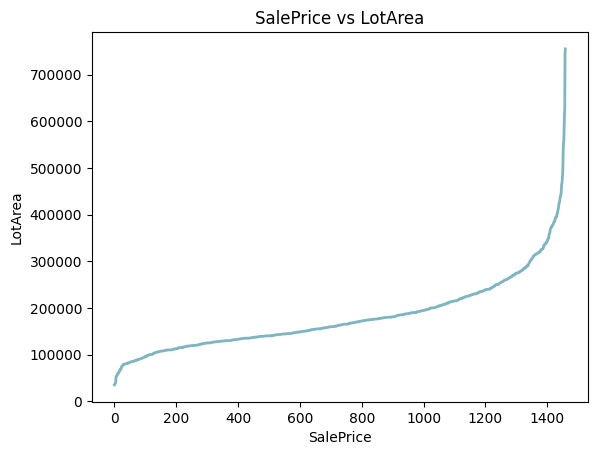

In [125]:
lineplot(list(range(0, len(df["SalePrice"]))), sorted(df["SalePrice"].to_list()), "SalePrice", "LotArea", "SalePrice vs LotArea")

##### Scatterplot & Lineplot for all the other correlated items

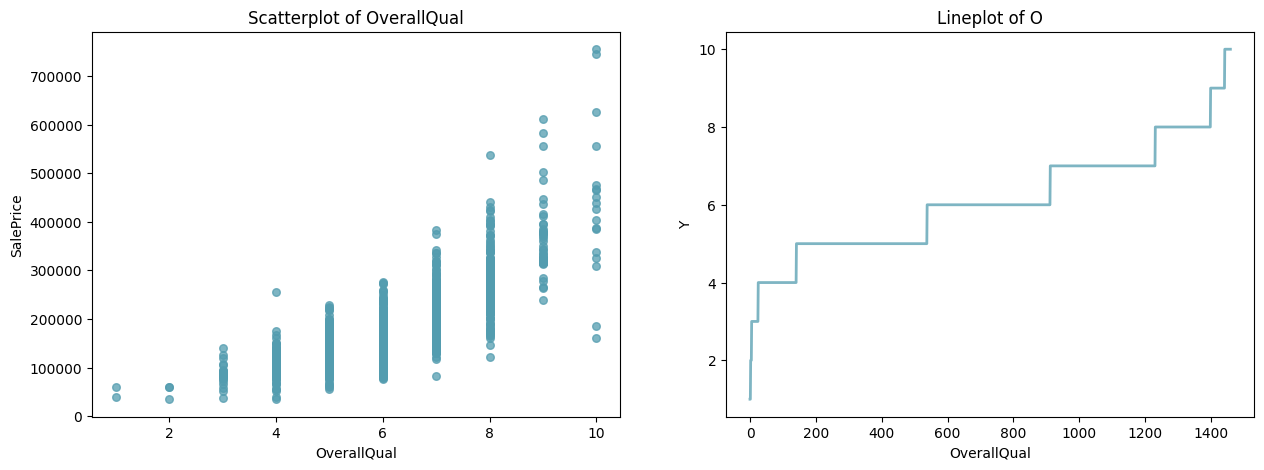

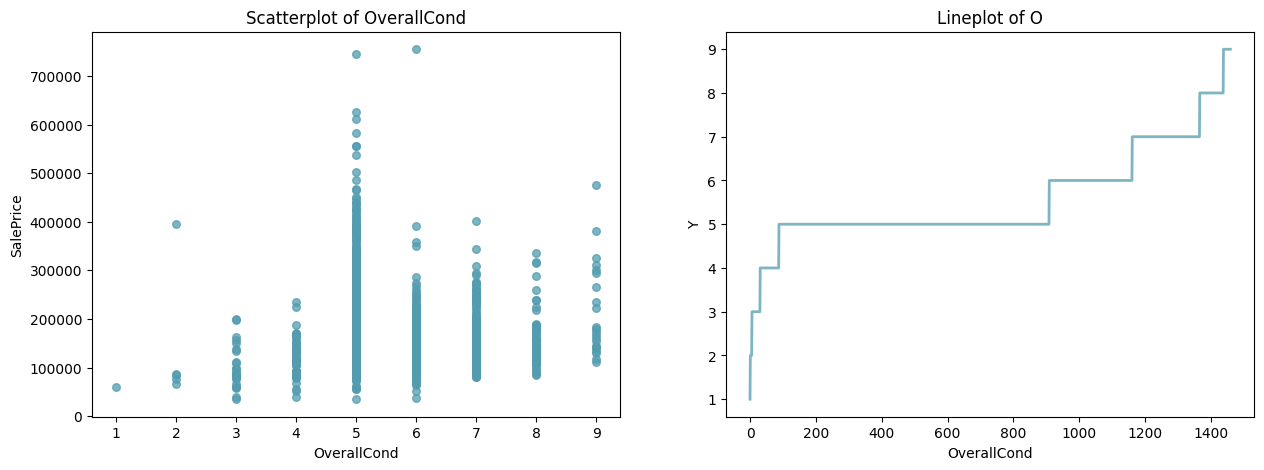

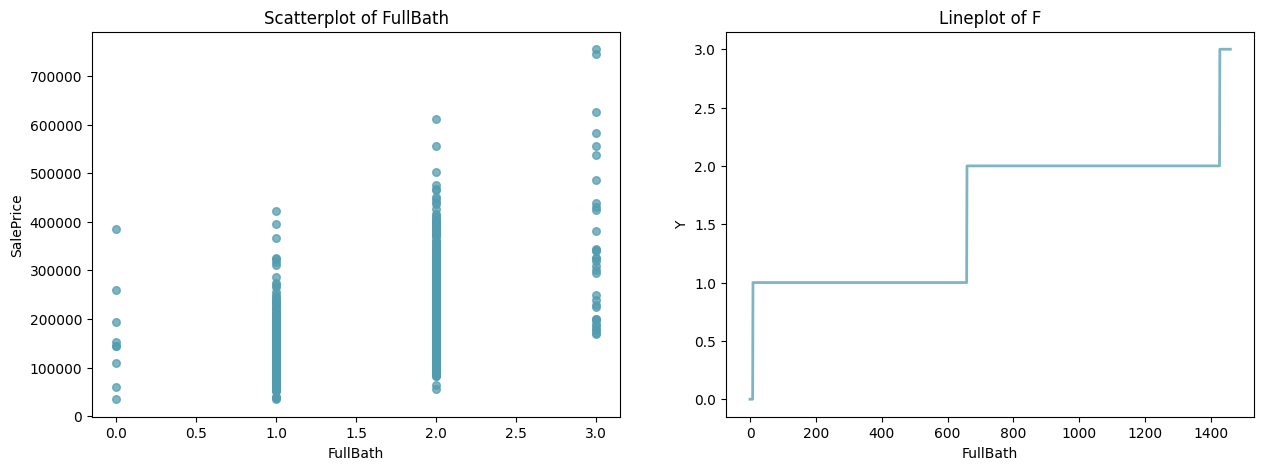

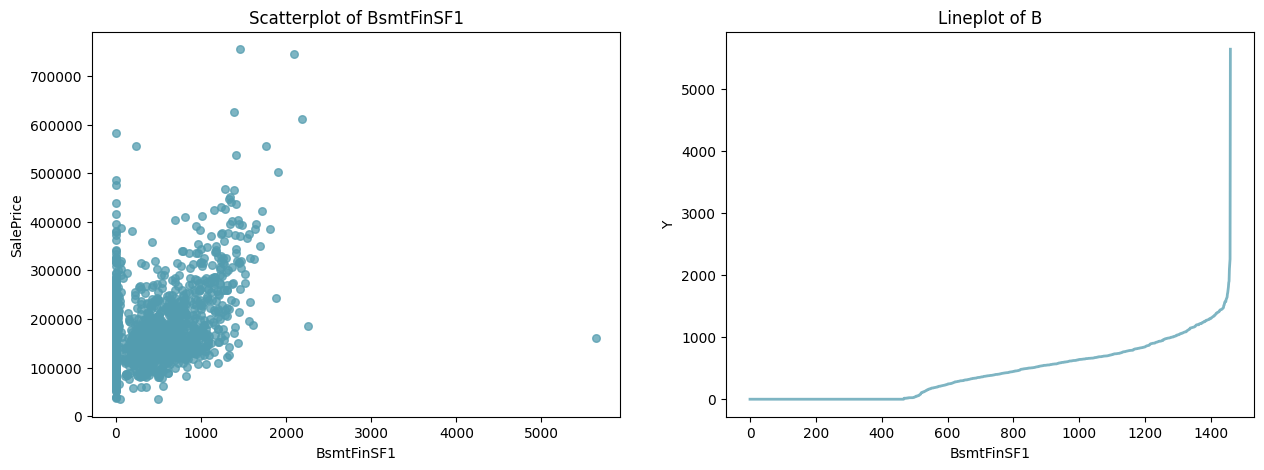

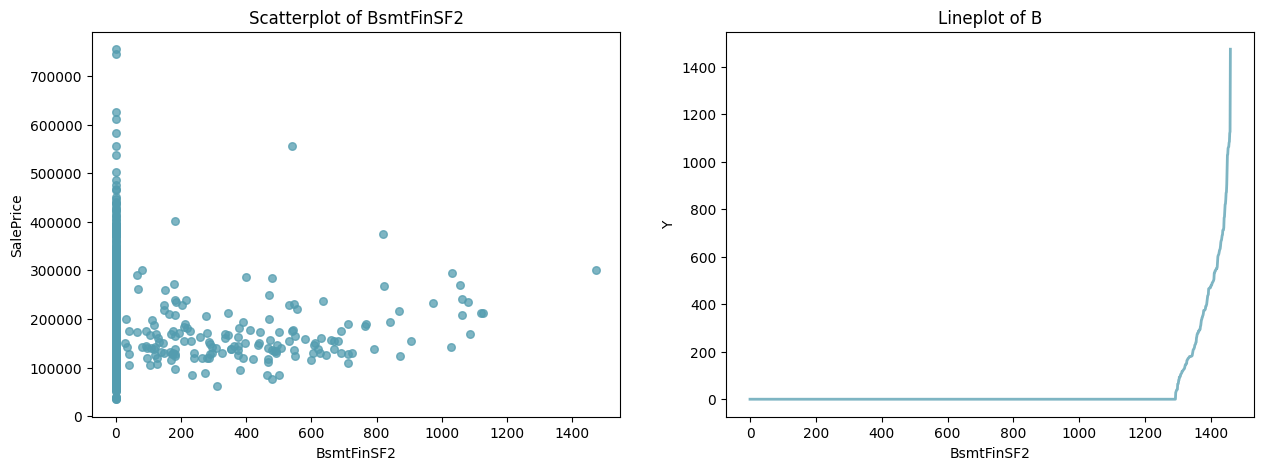

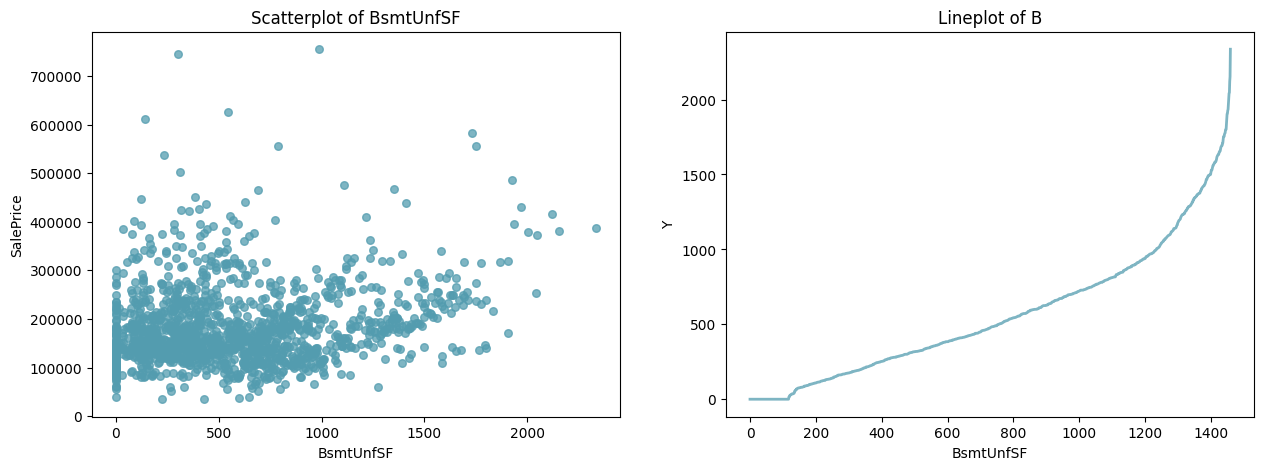

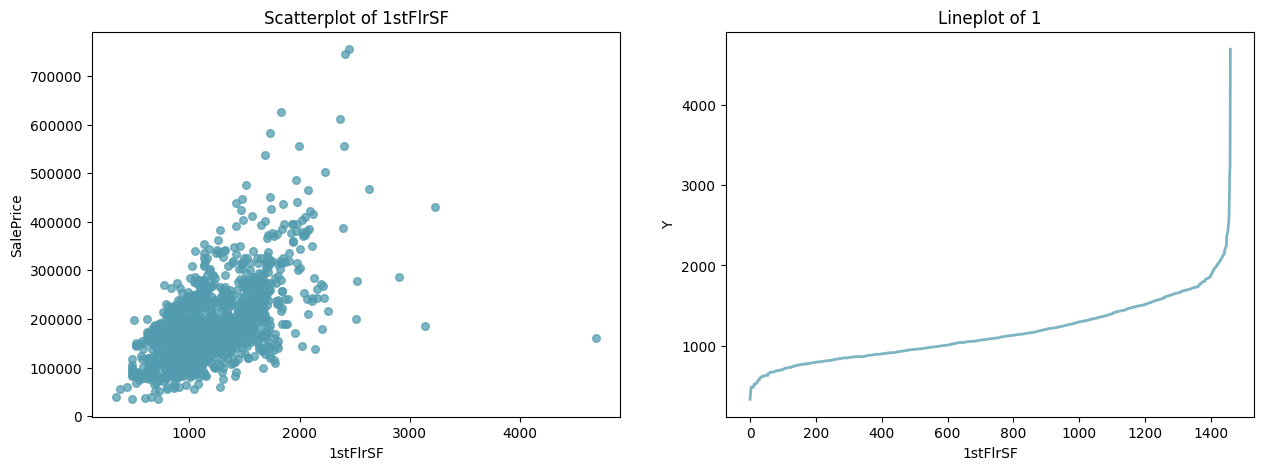

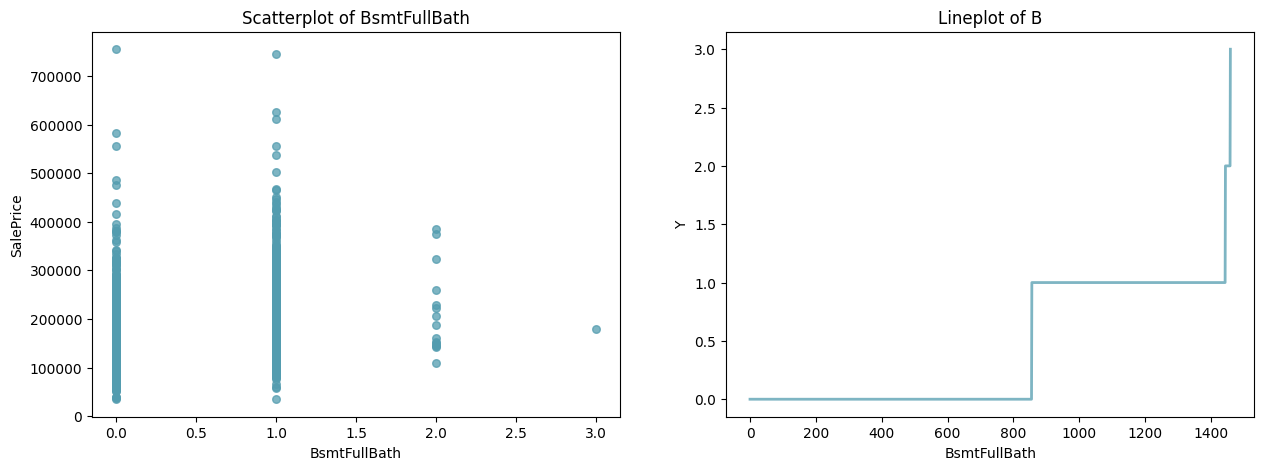

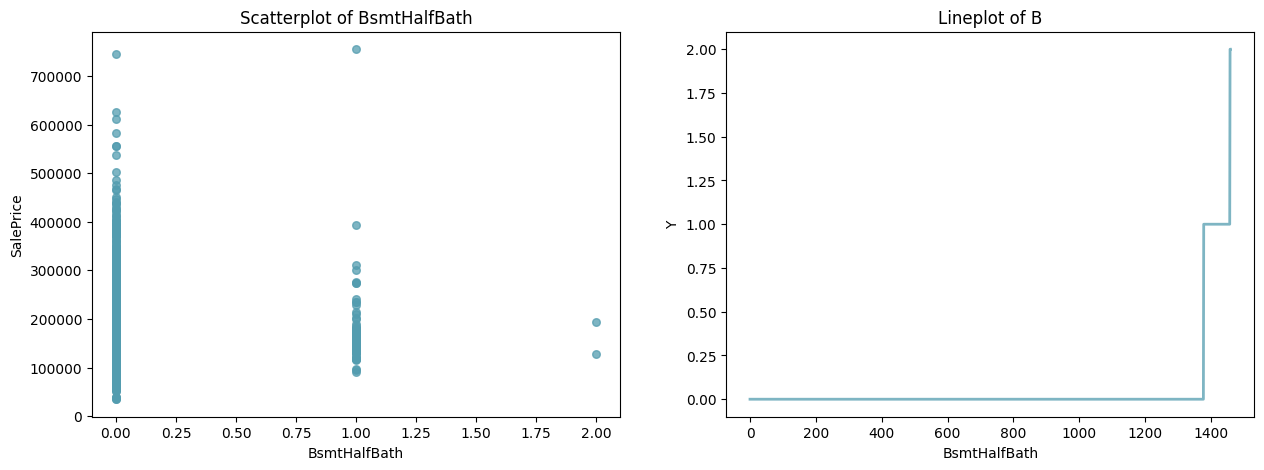

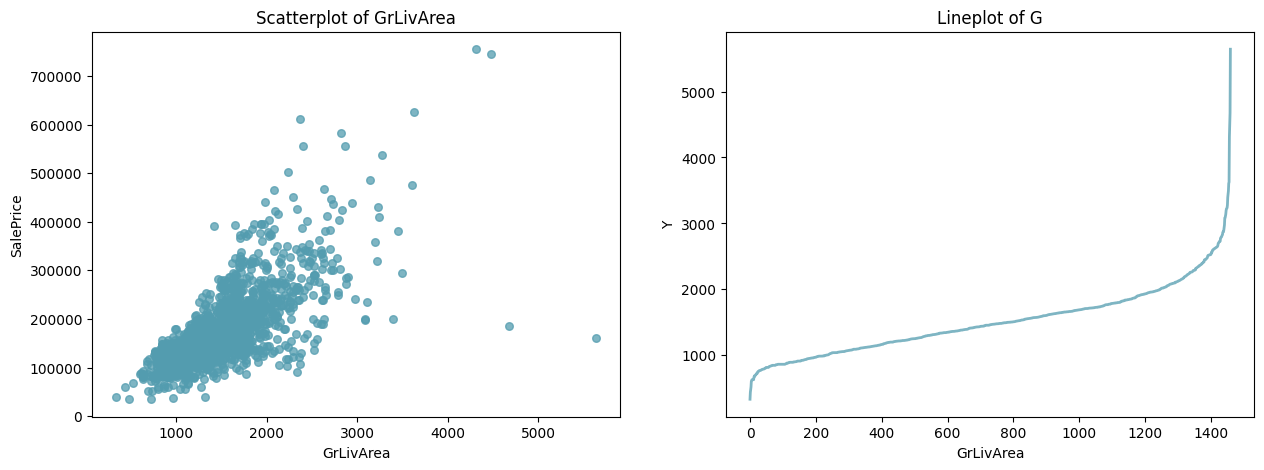

In [126]:
for attribute in top_10_correlated_attributes:
    scatter_and_lineplot(df[attribute].to_list(), df["SalePrice"].to_list(), [i for i in range(len(df[attribute].to_list()))], sorted(df[attribute].to_list()), attribute, "SalePrice", attribute, "Y", "Scatterplot of " + attribute, "Lineplot of " + attribute[0])

In [141]:
def histogram(x_data, x_label, title):
    fig, ax = plt.subplots()
    sns.histplot(x_data, kde=True, stat="density", bins=50)

    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel("Frequency")
    plt.savefig(title + '.png', bbox_inches='tight')
    plt.show()
    plt.close()

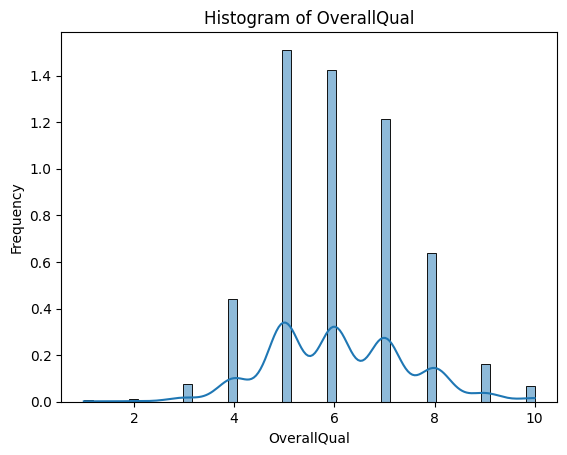

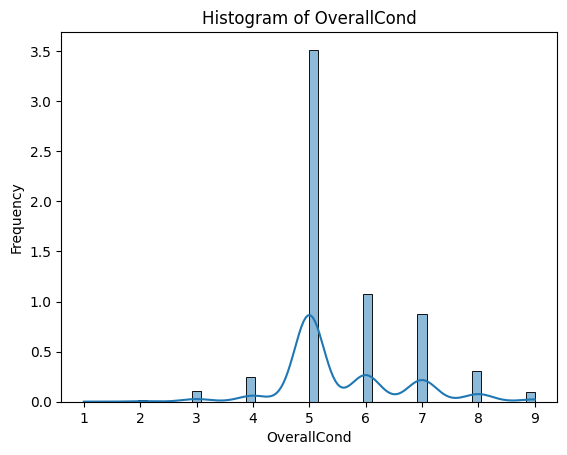

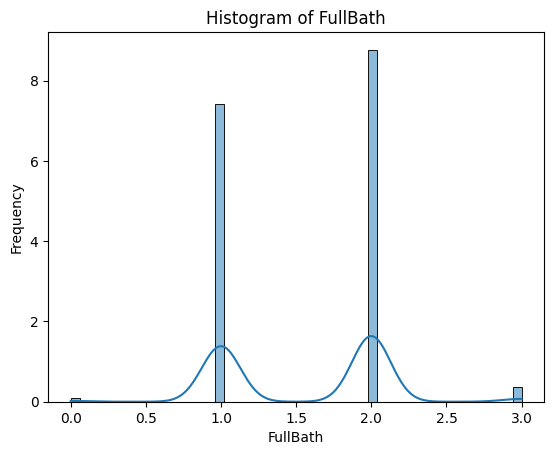

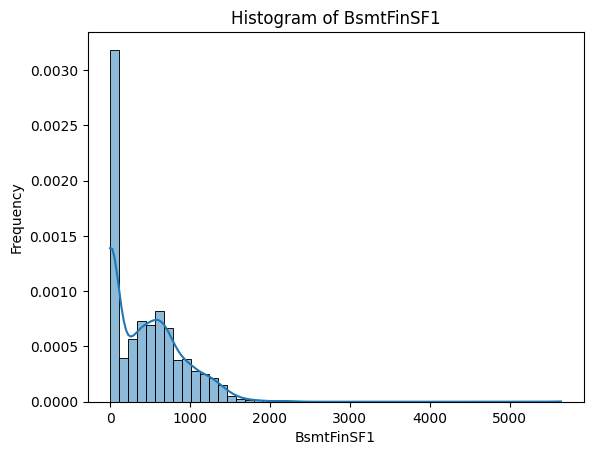

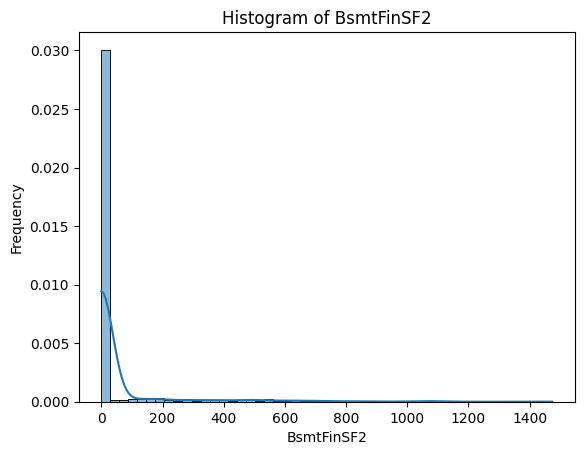

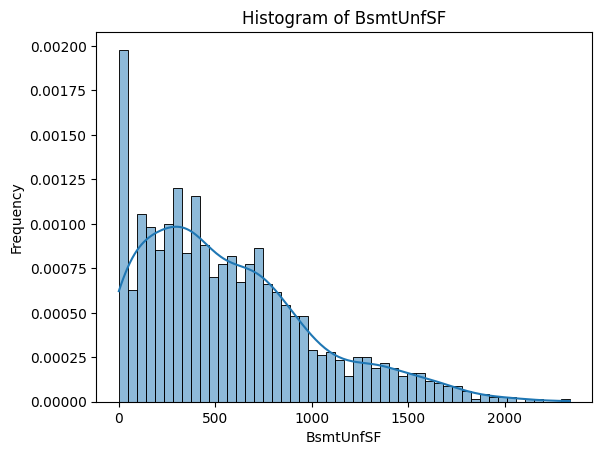

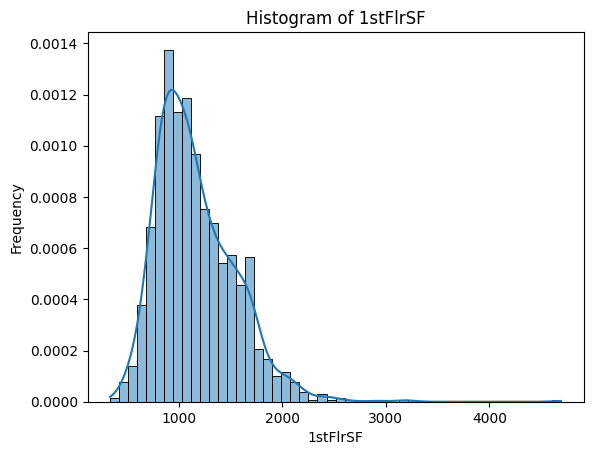

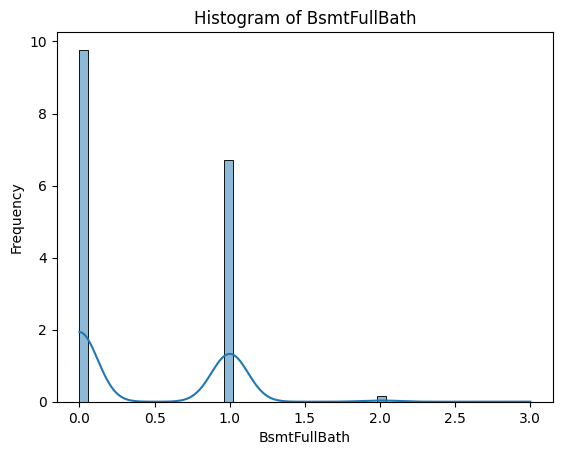

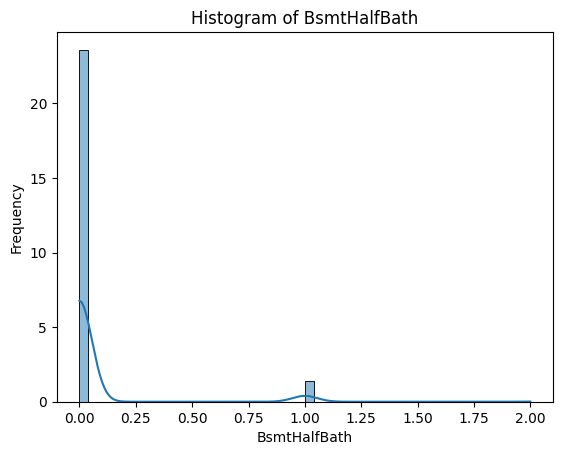

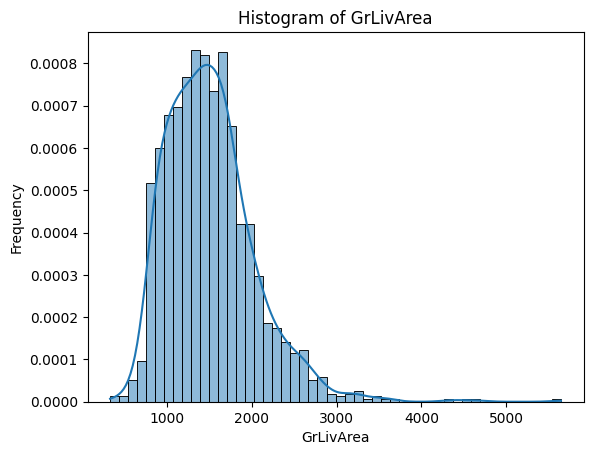

In [142]:
for attribute in top_10_correlated_attributes:
    histogram(df[attribute].to_list(), attribute, "Histogram of " + attribute)